<a href="https://colab.research.google.com/github/bok-h22/semi-project/blob/master/API_%ED%99%9C%EC%9A%A9_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

exdata = pd.read_csv("/content/훈련용 데이터.csv", encoding='cp949')
exdata = exdata.sort_values('value', ascending = False)
exdata

In [ ]:
bot = pd.read_csv("/content/BOTTOM 15 행정동.csv", encoding='cp949')
top = pd.read_csv("/content/TOP 15 행정동.csv", encoding='cp949')

In [ ]:
bot15 = exdata[-15:]
top15 = exdata[:15]

In [ ]:
top15.rename(columns = {'가구유형': '주택 수'}, inplace = True)
bot15.rename(columns = {'가구유형': '주택 수'}, inplace = True)

<ipython-input-16-71c13437681b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15.rename(columns = {'가구유형': '주택 수'}, inplace = True)
<ipython-input-16-71c13437681b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot15.rename(columns = {'가구유형': '주택 수'}, inplace = True)


In [ ]:
import numpy as np

top15_mean = np.mean(top15[['30~59세 인구', '평균 버스 이용량 (명)', '수요', '인프라', '경제', '비만도 분포', '1~2인가구', '3인 가구 이상', '주택 수']])
top15_mean['구분'] = '상위 15개 매장'

bot15_mean = np.mean(bot15[['30~59세 인구', '평균 버스 이용량 (명)', '수요', '인프라', '경제', '비만도 분포', '1~2인가구', '3인 가구 이상', '주택 수']])
bot15_mean['구분'] = '하위 15개 매장'

ex_df =pd.DataFrame([top15_mean, bot15_mean])
ex_df

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,30~59세 인구,평균 버스 이용량 (명),수요,인프라,경제,비만도 분포,1~2인가구,3인 가구 이상,주택 수,구분
0,0.167541,-0.189206,-0.436282,-0.536352,-0.109729,-0.226579,-0.301183,0.405653,-0.112631,상위 15개 매장
1,0.087270,0.414957,-0.111412,0.011240,-0.025872,0.418997,0.277811,0.012411,0.600977,하위 15개 매장


In [ ]:
ex_melt = pd.melt(ex_df, id_vars=['구분'], value_vars=['30~59세 인구', '평균 버스 이용량 (명)', '수요', '인프라', '경제', '비만도 분포', '1~2인가구', '3인 가구 이상', '주택 수']).sort_values('구분')
ex_melt

,구분,variable,value
0,상위 15개 매장,30~59세 인구,0.167541
14,상위 15개 매장,3인 가구 이상,0.405653
12,상위 15개 매장,1~2인가구,-0.301183
10,상위 15개 매장,비만도 분포,-0.226579
16,상위 15개 매장,주택 수,-0.112631
6,상위 15개 매장,인프라,-0.536352
8,상위 15개 매장,경제,-0.109729
4,상위 15개 매장,수요,-0.436282
2,상위 15개 매장,평균 버스 이용량 (명),-0.189206
7,하위 15개 매장,인프라,0.011240


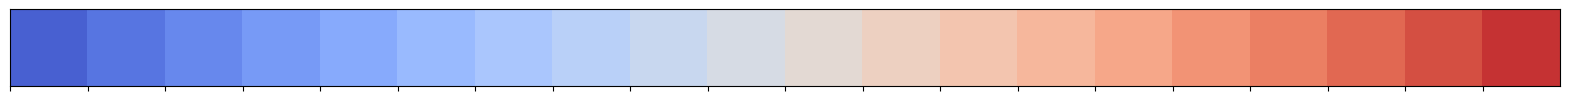

(-0.7, 0.8)

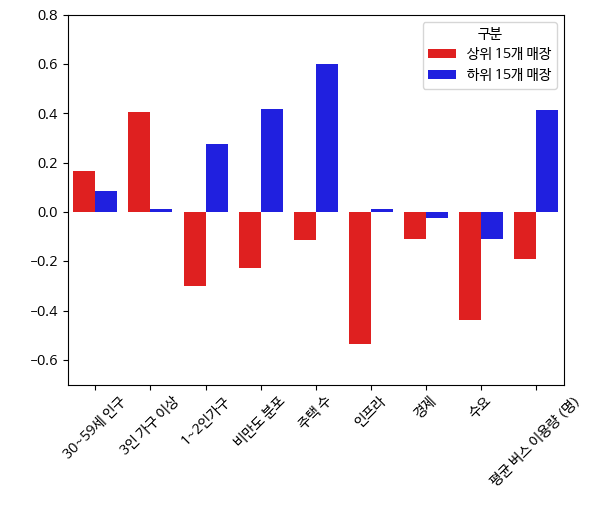

In [ ]:
sns.barplot(x='variable', 
            y='value', 
            data=ex_melt, 
            hue='구분', 
            palette=sns.blend_palette(['red', 'blue'],2))
plt.xticks(rotation = 45)
plt.xlabel(' ')
plt.ylabel(' ')
plt.ylim(-.7,0.8)

In [ ]:
top10_mean.drop('구분', inplace=True)
bot10_mean.drop('구분', inplace=True)

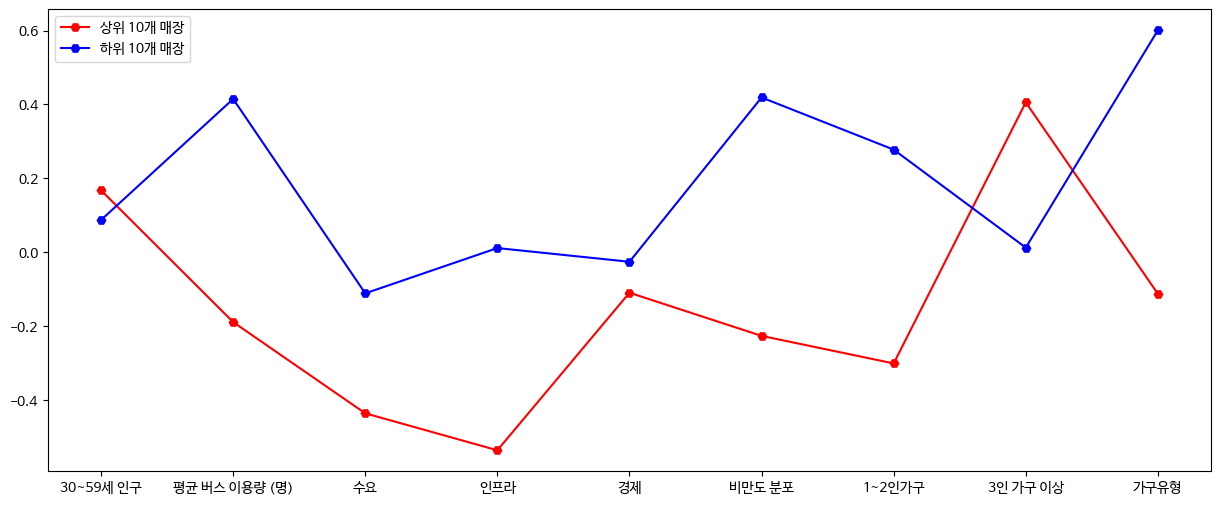

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['30~59세 인구', '평균 버스 이용량 (명)', '수요', '인프라', '경제', '비만도 분포', '1~2인가구', '3인 가구 이상', '가구유형']

plt.figure(figsize=(15,6))
plt.rc('font', family='NanumBarunGothic') 
plt.plot(top10_mean, marker='H', linestyle='-', color='r')
plt.plot(bot10_mean, marker='H', linestyle='-', color='b')

plt.legend(["상위 10개 매장", "하위 10개 매장"])
plt.show()

In [ ]:
# 한글 출력

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 마이너스 부호

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
sns.barplot(x="인프라", y="행정동", data=top5, hue='행정동')
plt.title("밀키트 입지요인 분석 상위 15곳 선정\n")
plt.xlabel('1인당 평균 재방문 횟수')
plt.ylabel('')
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.xlim(0, 3.0)
plt.show()

#카카오 맵 API

In [ ]:
#담꾹 좌표 불러오기
import pandas as pd
x_y = pd.read_csv('/content/예측 행정동 좌표_최종.csv', encoding='cp949').values.tolist()
x_y

[['인헌동', 1, 37.49467008, 127.0551499],
 ['인헌동', 2, 37.49214521, 127.0593771],
 ['인헌동', 3, 37.4962711, 127.0607826],
 ['보라매동', 1, 37.49219235, 126.928173],
 ['보라매동', 2, 37.49064533, 126.9327653],
 ['보라매동', 3, 37.48755687, 126.9363863]]

In [ ]:
# 인프라 (편의점)

import requests
import json
import pandas as pd

url = 'https://dapi.kakao.com/v2/local/search/keyword.json'

인근_편의점= []

for i in range(len(x_y)):

    data = {}
    
    dong_name = x_y[i][0]
    dong_x = x_y[i][3]
    dong_y = x_y[i][2]

    params = {'query' : '편의점',
                'x' : dong_x,
                'y' : dong_y,
                'radius' : 500}

    kakao_key = '2dc142a121aa04c7f2cf477c8daa9074'

    conv = requests.get(url = url, 
                        params = params, 
                        headers = {"Authorization":f"KakaoAK {kakao_key}"}).json()
    conv_cnt = conv['meta']['total_count']

    #데이터 넣기
    data['행정동'] = dong_name
    data['지점'] = x_y[i][1]
    data['인근 편의점 수'] = conv_cnt

    인근_편의점.append(data)

인근_편의점 = pd.DataFrame(인근_편의점)
인근_편의점

,행정동,지점,인근 편의점 수
0,인헌동,1,16
1,인헌동,2,10
2,인헌동,3,25
3,보라매동,1,25
4,보라매동,2,20
5,보라매동,3,20


Text(0, 0.5, ' ')

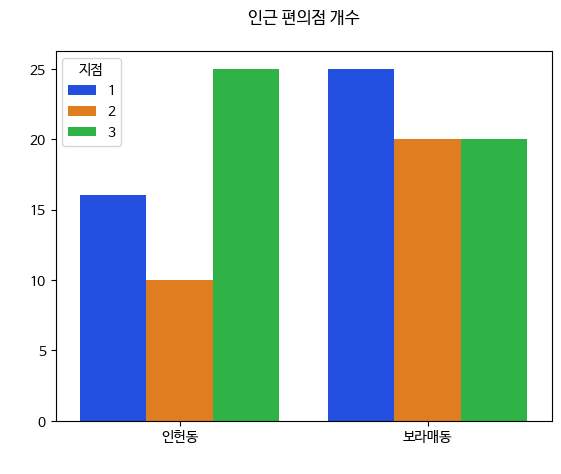

In [ ]:
# 막대기
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='행정동', y='인근 편의점 수', data=인근_편의점, hue='지점')

plt.title('인근 편의점 개수\n')
plt.xlabel(' ')
plt.ylabel(' ')
#plt.ylim(-.7,0.8)

In [ ]:
# 인프라 (음식점)

import requests
import json
import pandas as pd

url = 'https://dapi.kakao.com/v2/local/search/keyword.json'

인근_음식점= []

for i in range(len(x_y)):

    data = {}
    
    dong_name = x_y[i][0]
    dong_x = x_y[i][3]
    dong_y = x_y[i][2]

    params = {'query' : '음식점',
                'x' : dong_x,
                'y' : dong_y,
                'radius' : 500}

    kakao_key = '2dc142a121aa04c7f2cf477c8daa9074'

    rest = requests.get(url = url, 
                        params = params, 
                        headers = {"Authorization":f"KakaoAK {kakao_key}"}).json()
    rest_cnt = rest['meta']['total_count']

    #데이터 넣기
    data['행정동'] = dong_name
    data['지점'] = x_y[i][1]
    data['인근 음식점 수'] = rest_cnt

    인근_음식점.append(data)

인근_음식점 = pd.DataFrame(인근_음식점)
인근_음식점

,행정동,지점,인근 음식점 수
0,인헌동,1,285
1,인헌동,2,148
2,인헌동,3,388
3,보라매동,1,502
4,보라매동,2,241
5,보라매동,3,323


Text(0, 0.5, ' ')

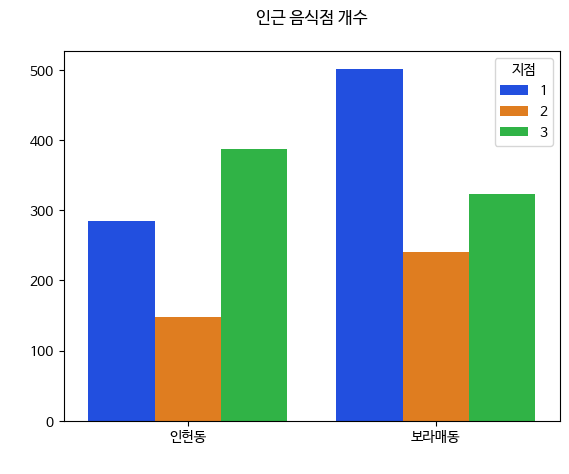

In [ ]:
# 막대기
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='행정동', y='인근 음식점 수', data=인근_음식점, hue='지점')

plt.title('인근 음식점 개수\n')
plt.xlabel(' ')
plt.ylabel(' ')
#plt.ylim(-.7,0.8)

In [ ]:
# 인프라 (대형마트)

import requests
import json
import pandas as pd

url = 'https://dapi.kakao.com/v2/local/search/keyword.json'

인근_대형마트= []

for i in range(len(x_y)):

    data = {}
    
    dong_name = x_y[i][0]
    dong_x = x_y[i][3]
    dong_y = x_y[i][2]

    params = {'query' : '대형마트',
                'x' : dong_x,
                'y' : dong_y,
                'radius' : 500}

    kakao_key = '2dc142a121aa04c7f2cf477c8daa9074'

    mart = requests.get(url = url, 
                        params = params, 
                        headers = {"Authorization":f"KakaoAK {kakao_key}"}).json()
    mart_cnt = mart['meta']['total_count']

    #데이터 넣기
    data['행정동'] = dong_name
    data['지점'] = x_y[i][1]
    data['인근 대형마트 수'] = mart_cnt

    인근_대형마트.append(data)

인근_대형마트 = pd.DataFrame(인근_대형마트)
인근_대형마트

,행정동,지점,인근 대형마트 수
0,인헌동,1,0
1,인헌동,2,0
2,인헌동,3,0
3,보라매동,1,0
4,보라매동,2,0
5,보라매동,3,0


Text(0, 0.5, ' ')

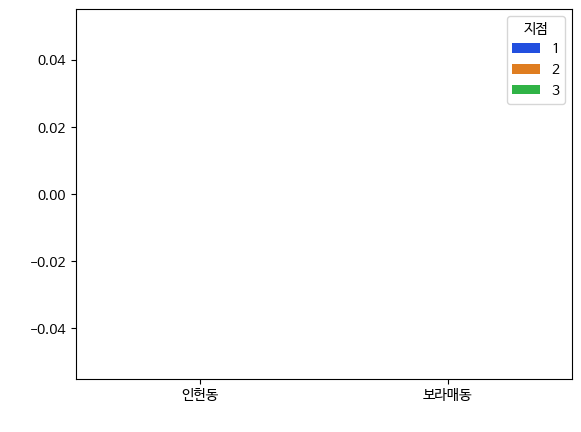

In [ ]:
# 막대기
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='행정동', y='인근 대형마트 수', data=인근_대형마트, hue='지점')

plt.title('인근 대형마트 개수\n')
plt.xlabel(' ')
plt.ylabel(' ')
#plt.ylim(-.7,0.8)

In [ ]:
data = {}

dong_name = x_y[i][0]
dong_x = x_y[i][3]
dong_y = x_y[i][2]

params = {'query' : '주거시설',
            'x' : dong_x,
            'y' : dong_y,
            'radius' : 500}

kakao_key = '2dc142a121aa04c7f2cf477c8daa9074'

home = requests.get(url = url, 
                    params = params, 
                    headers = {"Authorization":f"KakaoAK {kakao_key}"}).json()
home

In [ ]:
# 주택

import requests
import json
import pandas as pd

url = 'https://dapi.kakao.com/v2/local/search/keyword.json'

인근_주택= []

for i in range(len(x_y)):

    data = {}
    
    dong_name = x_y[i][0]
    dong_x = x_y[i][3]
    dong_y = x_y[i][2]

    params = {'query' : '주거시설',
                'x' : dong_x,
                'y' : dong_y,
                'radius' : 500}

    kakao_key = '2dc142a121aa04c7f2cf477c8daa9074'

    home = requests.get(url = url, 
                        params = params, 
                        headers = {"Authorization":f"KakaoAK {kakao_key}"}).json()
    home_cnt = home['meta']['total_count']

    #데이터 넣기
    data['행정동'] = dong_name
    data['지점'] = x_y[i][1]
    data['인근 주택'] = home_cnt

    인근_주택.append(data)

인근_주택 = pd.DataFrame(인근_주택)
인근_주택

,행정동,지점,인근 주택
0,인헌동,1,148
1,인헌동,2,83
2,인헌동,3,126
3,보라매동,1,394
4,보라매동,2,458
5,보라매동,3,451


Text(0, 0.5, ' ')

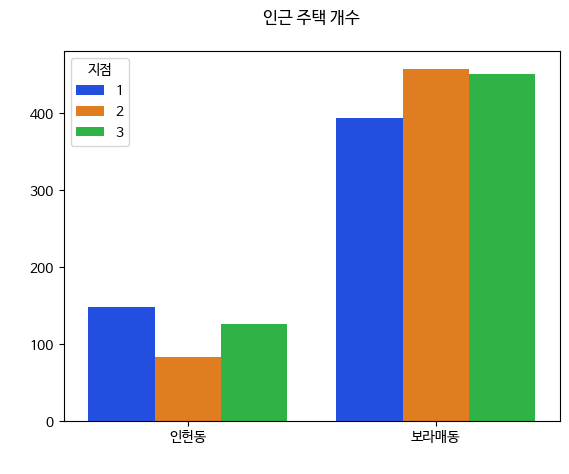

In [ ]:
# 막대기
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='행정동', y='인근 주택', data=인근_주택, hue='지점')

plt.title('인근 주택 개수\n')
plt.xlabel(' ')
plt.ylabel(' ')
#plt.ylim(-.7,0.8)

In [ ]:
data = {}
    
dong_name = x_y[i][0]
dong_x = x_y[i][3]
dong_y = x_y[i][2]

params = {'query' : '정류장',
            'x' : dong_x,
            'y' : dong_y,
            'radius' : 500}

kakao_key = '2dc142a121aa04c7f2cf477c8daa9074'

bus = requests.get(url = url, 
                    params = params, 
                    headers = {"Authorization":f"KakaoAK {kakao_key}"}).json()
bus

{'documents': [],
 'meta': {'is_end': True,
  'pageable_count': 0,
  'same_name': {'keyword': '정류장', 'region': [], 'selected_region': ''},
  'total_count': 0}}

In [ ]:
# 버스정류장

import requests
import json
import pandas as pd

url = 'https://dapi.kakao.com/v2/local/search/keyword.json'

인근_버스정류장= []

for i in range(len(x_y)):

    data = {}
    
    dong_name = x_y[i][0]
    dong_x = x_y[i][3]
    dong_y = x_y[i][2]

    params = {'query' : '버스',
                'x' : dong_x,
                'y' : dong_y,
                'radius' : 500}

    kakao_key = '2dc142a121aa04c7f2cf477c8daa9074'

    bus = requests.get(url = url, 
                        params = params, 
                        headers = {"Authorization":f"KakaoAK {kakao_key}"}).json()
    bus_cnt = bus['meta']['total_count']

    #데이터 넣기
    data['행정동'] = dong_name
    data['지점'] = x_y[i][1]
    data['인근 버스 정류장'] = bus_cnt

    인근_버스정류장.append(data)

인근_버스정류장 = pd.DataFrame(인근_버스정류장)
인근_버스정류장

,행정동,지점,인근 버스 정류장
0,인헌동,1,0
1,인헌동,2,0
2,인헌동,3,0
3,보라매동,1,0
4,보라매동,2,2
5,보라매동,3,1


In [ ]:
# 막대기
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='행정동', y='인근 버스 정류장', data=인근_버스정류장, hue='지점')

plt.title('인근 버스 정류장 개수\n')
plt.xlabel(' ')
plt.ylabel(' ')
#plt.ylim(-.7,0.8)

In [ ]:
import pandas as pd

버스 = pd.read_csv('/content/예측 행정동 좌표_버스.csv', encoding = 'cp949')

Text(0, 0.5, ' ')

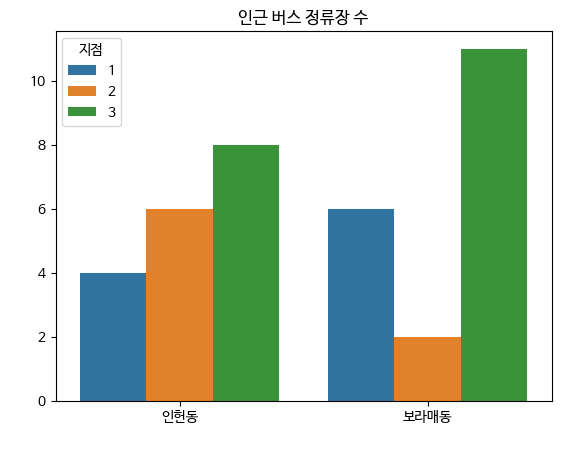

In [ ]:
# 막대기
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='동', y='버스', data=버스, hue='지점')

plt.title('인근 버스 정류장 수')
plt.xlabel(' ')
plt.ylabel(' ')
#plt.ylim(-.7,0.8)

#좌표로 행정동 추출

In [ ]:
x_y

In [ ]:
import requests

url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json'
kakao_key = '2dc142a121aa04c7f2cf477c8daa9074'


서울시_편의점 = []

for i in range(len(x_y)):

    mil_name = x_y[i][0]
    mil_x = x_y[i][3]
    mil_y = x_y[i][4]

    params = {'x' : mil_x,
              'y' : mil_y}

    hjd = requests.get(url = url, 
                        params = params, 
                        headers = {"Authorization":f"KakaoAK {kakao_key}"}).json()['documents'][1]

    data = {}

    #데이터 입력
    data['매장명'] = mil_name
    data['행정동 code'] = hjd["code"]
    data['행정동 주소'] = hjd["address_name"]
    data['시'] = hjd["region_1depth_name"]
    data['구'] = hjd["region_2depth_name"]
    data['동'] = hjd["region_3depth_name"]
    data['etc'] = hjd["region_4depth_name"]
    data['경도'] = mil_y
    data['위도'] = mil_x

    서울시_편의점.append(data)

서울시_편의점 = pd.DataFrame(서울시_편의점)

In [ ]:
#담꾹_행정동.to_csv('./서울시 편의점 현황.csv', encoding = 'cp949')
서울시_편의점 = pd.read_csv('C:/Users/lmln8/Downloads/서울시 편의점 현황.csv', encoding='cp949')
서울시_편의점_sum = 서울시_편의점.groupby('행정동 code', as_index=False)['num'].sum()
서울시_편의점_sum.to_csv('./서울시 편의점 현황_집계.csv', encoding='cp949')

#최종 데이터 병합

In [ ]:
담꾹_지도API_최종 = pd.merge(담꾹_행정동, 인근_밀키트_매장_수, on = "매장명", how = "inner")
담꾹_지도API_최종 = pd.merge(담꾹_지도API_최종, 인근_편의점_매장_수, on = "매장명", how = "inner")
담꾹_지도API_최종 = pd.merge(담꾹_지도API_최종, 인근_대형마트_매장_수, on = "매장명", how = "inner")
담꾹_지도API_최종

In [ ]:
#output
담꾹_지도API_최종.to_csv("/Users/lmln8/Desktop/담꾹 지도API 최종.csv", encoding="utf-8-sig")

In [ ]:
import pandas as pd
import requests
아파트코드_최종 = pd.read_csv('/Users/lmln8/Desktop/아파트코드_최종_없음삭제.csv').values.tolist()
아파트세대수 = []
for bjd_code in range(30):
    아파트코드 = 아파트코드_최종[bjd_code][2]
    url = f'https://apis.data.go.kr/1613000/AptBasisInfoService1/getAphusBassInfo?serviceKey=lcjsLidzgyNDrzi7pA5P0N5zo4z80gxg5NfxMgOGEQnHylY3PO5AicJgFHwU3vaR8zuiE%2B6k2O1ojfc%2FxvyMMw%3D%3D&_type=json&kaptCode={아파트코드}'
    response = requests.get(url)
    data = {}
    if 아파트코드 == '없음':
        print('아파트 없음')
        pass
    else:
        ex1 = response.json()['response']['body']['item']
        data['아파트명'] = ex1['kaptName']
        data['아파트 code'] = ex1['kaptCode']
        data['법정동코드'] = ex1['bjdCode']
        data['아파트 세대수'] = ex1['kaptdaCnt']
        print(data)
        아파트세대수.append(data)